# Pennsylvania Overdose Research Proposal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)
df = pd.read_csv('Overdose_Information_Network_Data_Current_County_State_Police.csv')

# Describing the Dataset

This data has been downloaded from Pennsylvania's OpenData PA repository. It focuses on drug overdose data in the state of Pennsylvania from 2018 to the 2019. It should be noted that primary collection method is that of self-reporting by the County and State Police Department. Because of this, there are can be a self-reporting bias. there are also several missing values and several instances where a value is coded are 'unkown'. An example is can be seen in the 'Survive' column. 


The following is a description of the data from the OpenData website:
"This dataset contains summary information on overdose responses and naloxone administrations by Pennsylvania criminal justice agencies and some third-party (i.e. EMS, Fire, Medical Staff, etc) first responders voluntarily entering incident data. Due to the voluntary nature of the application, the ODIN information provided may not represent the totality of all overdose and/or naloxone administration incidents involving criminal justice agencies occurring within the Commonwealth. Although this dataset does include some third-party administrations of naloxone, it should not be used to measure overdose response and naloxone administration incidents among all first responders." - OpenData PA

# Exploratory analysis


In [3]:
df.head()

,Incident ID,Incident Date,Incident Time,Day,Incident County Name,Incident State,Victim ID,Gender Desc,Age Range,Race,Ethnicity Desc,Victim State,Victim County,Accidental Exposure,Victim OD Drug ID,Susp OD Drug Desc,Naloxone Administered,Administration ID,Dose Count,Dose Unit,Dose Desc,Response Time Desc,Survive,Response Desc,Revive Action Desc,Third Party Admin Desc,Incident County FIPS Code,Incident County Latitude,Incident County Longitude,Victim County FIPS Code,Victim County Latitude,Victim County Longitude,Incident County Latitude and Longitude,Victim County Latitude and Longitude
0,4927,09/25/2018,18:06:00,Tuesday,Delaware,Pennsylvania,4033,Male,25 - 29,White,Not Hispanic,Maryland,Out of State,False,5231,FENTANYL,Y,2887.0,3.0,4.0,MG,3-5 MINUTES,Y,RESPONSIVE BUT SEDATED,HOSPITAL CONSCIOUS,NaN,45,39.916579,-75.406277,999,NaN,NaN,"(39.916579, -75.406277)",NaN
1,4927,09/25/2018,18:06:00,Tuesday,Delaware,Pennsylvania,4033,Male,25 - 29,White,Not Hispanic,Maryland,Out of State,False,5232,HEROIN,Y,2887.0,3.0,4.0,MG,3-5 MINUTES,Y,RESPONSIVE BUT SEDATED,HOSPITAL CONSCIOUS,NaN,45,39.916579,-75.406277,999,NaN,NaN,"(39.916579, -75.406277)",NaN
2,4928,09/22/2018,01:04:00,Saturday,Bucks,Pennsylvania,4034,Male,25 - 29,White,Not Hispanic,Pennsylvania,Bucks,False,5233,HEROIN,Y,2888.0,1.0,4.0,MG,1-3 MINUTES,Y,RESPONSIVE AND ALERT,HOSPITAL CONSCIOUS,NaN,17,40.335011,-75.112912,17,40.335011,-75.112912,"(40.335011, -75.112912)","(40.335011, -75.112912)"
3,4928,09/22/2018,01:04:00,Saturday,Bucks,Pennsylvania,4034,Male,25 - 29,White,Not Hispanic,Pennsylvania,Bucks,False,5233,HEROIN,Y,2889.0,1.0,4.0,MG,1-3 MINUTES,Y,RESPONSIVE AND ALERT,HOSPITAL CONSCIOUS,NaN,17,40.335011,-75.112912,17,40.335011,-75.112912,"(40.335011, -75.112912)","(40.335011, -75.112912)"
4,4929,09/26/2018,11:47:00,Wednesday,Allegheny,Pennsylvania,4037,Male,25 - 29,White,Not Hispanic,Pennsylvania,Allegheny,False,5239,HEROIN,Y,2891.0,2.0,0.0,UNKNOWN,1-3 MINUTES,Y,RESPONSIVE BUT SEDATED,HOSPITAL CONSCIOUS,EMS,3,40.467355,-79.986198,3,40.467355,-79.986198,"(40.467355, -79.986198)","(40.467355, -79.986198)"


In [4]:
# change column names for ease of use.

data = df[['Incident County Name', 'Gender Desc', 'Race', 'Susp OD Drug Desc', 'Age Range', 'Victim County']]

names = {'Incident County Name':'County', 'Gender Desc': 'Gender', 'Race':'Race', 
         'Susp OD Drug Desc':'Drugs', 'Age Range':'Age'}

data = data.rename(columns=names)
data.head()

,County,Gender,Race,Drugs,Age,Victim County
0,Delaware,Male,White,FENTANYL,25 - 29,Out of State
1,Delaware,Male,White,HEROIN,25 - 29,Out of State
2,Bucks,Male,White,HEROIN,25 - 29,Bucks
3,Bucks,Male,White,HEROIN,25 - 29,Bucks
4,Allegheny,Male,White,HEROIN,25 - 29,Allegheny


              County
Allegheny       1118
York             938
Bucks            848
Chester          364
Luzerne          355
Lancaster        305
Dauphin          255
Montgomery       244
Westmoreland     205
Cambria          179


Text(0.5,1,'Overdoses Reported by Incident County')

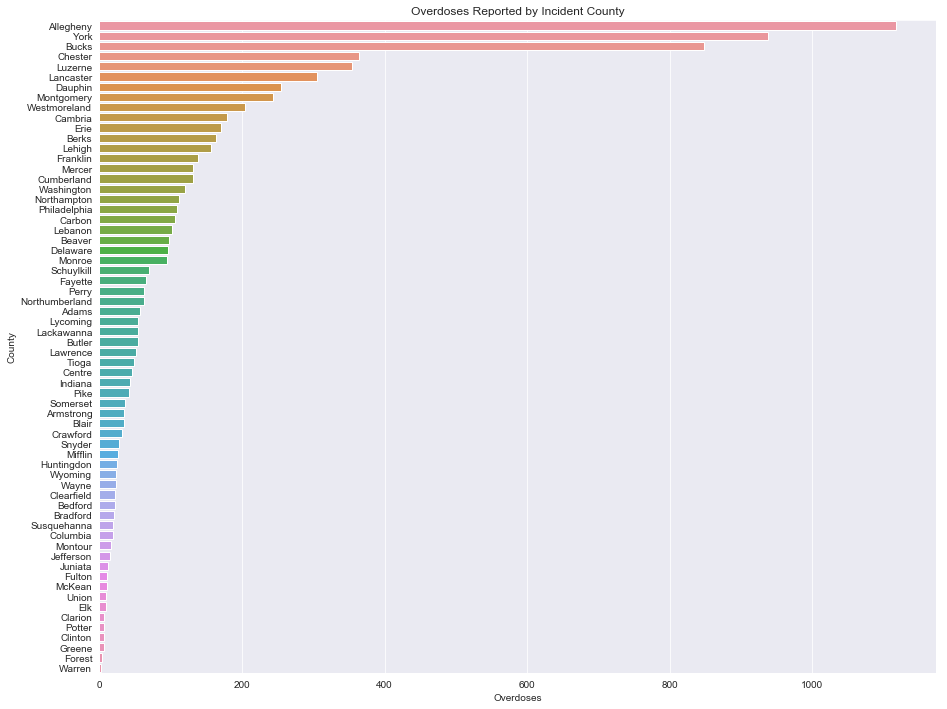

In [6]:
# Set style 
sns.set_style('darkgrid')

# Store data in a temporary dataframe and display it.
temp_data = pd.DataFrame(data['County'].value_counts())
print(temp_data.head(10))

# Create and display Barchart for the varaible.
plt.figure(figsize=(15,12))
sns.barplot(x=temp_data['County'], y=temp_data.index)
plt.xlabel('Overdoses')
plt.ylabel('County')
plt.title('Overdoses Reported by Incident County')

              Victim County
Allegheny              1042
York                    891
Bucks                   787
Chester                 333
Lancaster               324
Luzerne                 317
Dauphin                 222
Montgomery              221
Westmoreland            204
Berks                   171


Text(0.5,1,'Overdoses Reported by Victim County')

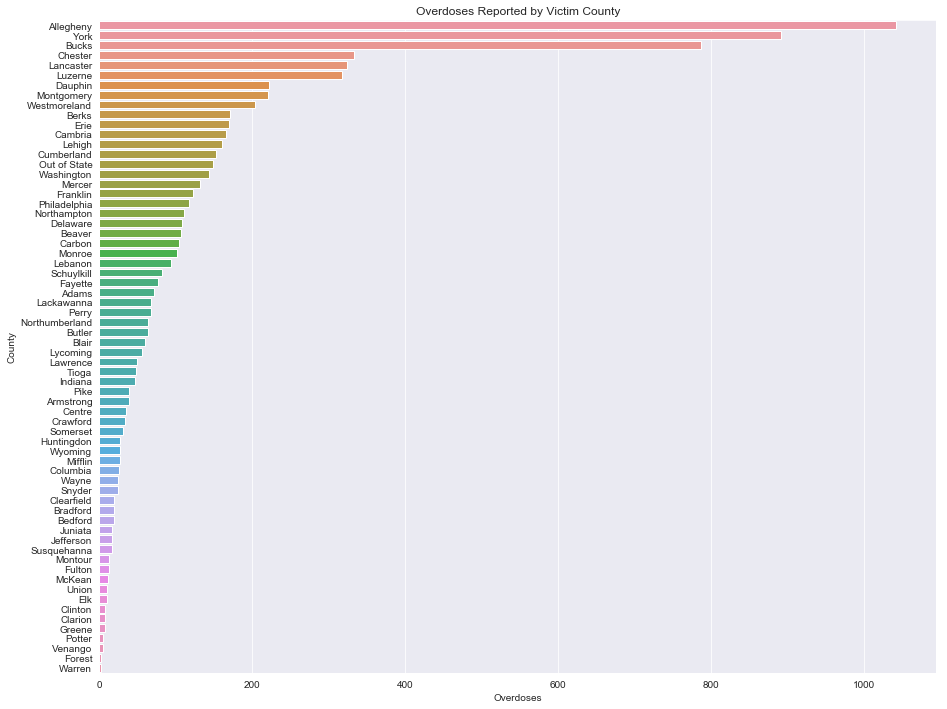

In [7]:
# Set style 
sns.set_style('darkgrid')

# Store data in a temporary dataframe and display it.
temp_data = pd.DataFrame(data['Victim County'].value_counts())
print(temp_data.head(10))

# Create and display Barchart for the varaible.
plt.figure(figsize=(15,12))
sns.barplot(x=temp_data['Victim County'], y=temp_data.index)
plt.xlabel('Overdoses')
plt.ylabel('County')
plt.title('Overdoses Reported by Victim County')

                                   Race
White                              7056
Black                               563
Unknown                              82
Asian or Pacific Islander            27
American Indian or Alaskan Native     2


Text(0.5,1,'Overdoses Reported by Race')

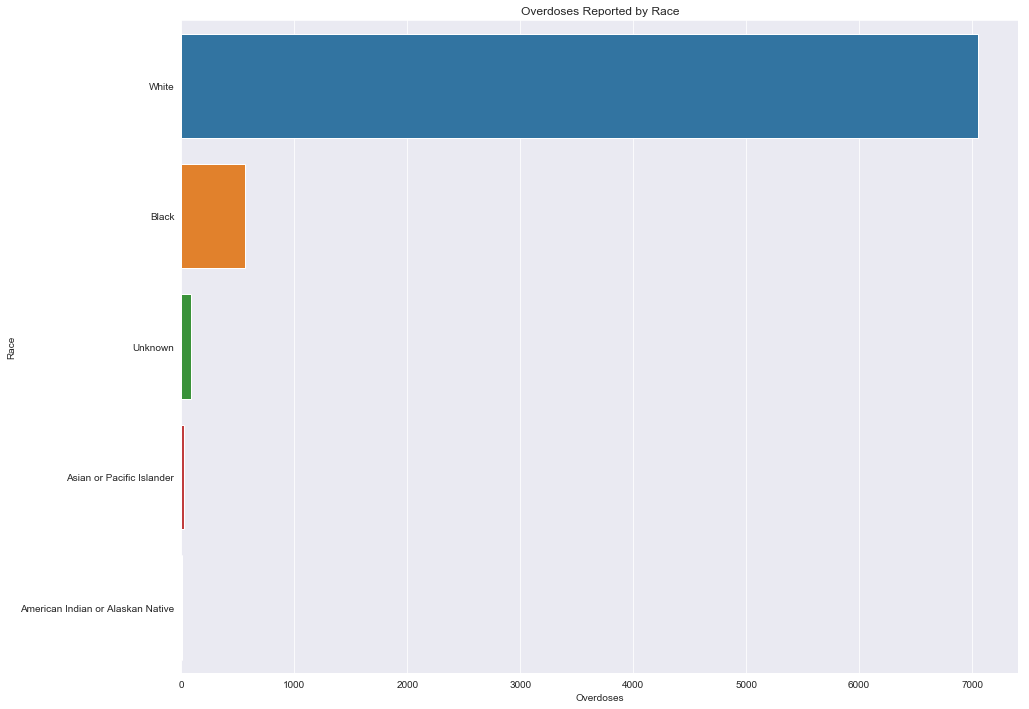

In [8]:
# Set style 
sns.set_style('darkgrid')

# Store data in a temporary dataframe and display it.
temp_data = pd.DataFrame(data['Race'].value_counts())
print(temp_data)

# Create and display Barchart for the varaible.
plt.figure(figsize=(15,12))
sns.barplot(x=temp_data['Race'], y=temp_data.index)
plt.xlabel('Overdoses')
plt.ylabel('Race')
plt.title('Overdoses Reported by Race')

In [9]:
race = data[['Race', 'County']]
race = race.groupby(by = race['County'])['Race'].value_counts()
race = race.to_frame()
race

Race
County         Race                                   
Adams          White                                48
               Black                                 9
Allegheny      White                               939
               Black                               171
               Unknown                               6
               Asian or Pacific Islander             2
Armstrong      White                                34
Beaver         White                                94
               Black                                 2
               Unknown                               2
Bedford        White                                20
               Black                                 2
Berks          White                               158
               Black                                 5
Blair          White                                33
               Black                                 1
Bradford       White                                21
Bucks          White                               777
               Black                                54
               Unknown                              12
               Asian or Pacific Islander             5
Butler         White                                53
               Unknown                               1
Cambria        White                               161
               Black                                17
               Unknown                               1
Carbon         White                               106
Centre         White                                44
               Black                                 2
Chester        White                               339
               Black                                23
               Asian or Pacific Islander             2
Clarion        White                                 7
Clearfield     White                                20
               Black                                 2
Clinton        White                                 6
Columbia       White                                18
               Black                                 1
Crawford       White                                32
Cumberland     White                               127
               Black                                 3
               Unknown                               1
Dauphin        White                               216
               Black                                34
               Asian or Pacific Islander             2
               Unknown                               2
               American Indian or Alaskan Native     1
Delaware       White                                87
               Black                                 8
               Unknown                               1
Elk            White                                 9
               Unknown                               1
Erie           White                               152
               Black                                15
               Unknown                               2
               Asian or Pacific Islander             1
Fayette        White                                61
               Black                                 5
Forest         White                                 3
               Black                                 1
Franklin       White                               134
               Black                                 4
Fulton         White                                11
Greene         White                                 5
               Black                                 1
Huntingdon     White                                25
Indiana        White                                43
Jefferson      White                                14
               Black                                 1
Juniata        White                                12
Lackawanna     White                                49
               Black               

# Experimental Design/Hypothesis

### Background 

It is important to note that this data, and consequently this analysis, is oberservational. Because of this, the reserach propsal will focus more on aquiring more data and information to answer questions regarding this datset, rather than an experiment where there are different groups and a treatment is administered.

The initial exploratory analysis focuses on two particular metrics which will inform the analysis. Those two metrics are 'Incident County' and 'Race'. Incident county was chosen primarily because it is a way of seeing what areas of Pennsylvania are being most reported. Race is also a way of showing what demographics are also being most reported. Both of these metrics are only a snapshot of the whole issue. There are several other variables which have recorded geographic data including Longitude and Latitude data and a distinction between 'Incident County' and 'Victim County' as there are several cases where the victim came ether from out of state or out of county.

When we look at the racial demographics of PA, the majority of reported cases report Caucasians of having some overdose. According to WolrdPopulationReview.com, PA is made up of '81.4% Caucasion, 11% African American, 3.1% Asian, 2.2% two or more races, 2% other races, and 0% Natives of North American', (http://worldpopulationreview.com/states/pennsylvania-population/). This explains why 'White' accounts for 91.3% of reported cases in this dataset.

### Hypothesis
What this analysis begins to explore is who (race) is being most affected by the opiod crisis and where the most reports are coming from. The proposed hypothesis is that there is a correlation between income/economic status/class, geography, medical history, and likelihood of being an overdose victim. 

### Rollout/Experiment Plan
In order to answer these question there are several steps that we would need to take. Primarily, we will have to look at different data repositories in order to gather the data which is missing from this dataset, and contatinate all of those into a single dataset which has the information we want to explore.
- first we would have to find income information on each OD victim in order to get a better picture of the economic range of people most affected. The CDC has collected income data on OD deaths regarding heroin. We can also perform some statistical analysis on the different areas to see what the mean, median etc are. (https://www.cdc.gov/drugoverdose/index.html)
- for the second point, location, we can look at an urbanicity index which is also availble through the CDC data. Then use this data to look at the areas (urban, suburban, and rural) to see what areas are having the most cases. (https://www.cdc.gov/drugoverdose/data/heroin.html)
- the CDC also has data on prescription opiods as well as well as other medical information. (https://www.cdc.gov/drugoverdose/data/prescribing.html)

The goal of this analysis is to identify who is being most reported, where are they located, and what are their income levels.

### Evaluation Plan
This analysis will be deemed a success if we can have data on all of the specific variables I have described above, obtained from credible sources, explored and analyized the data, and can answer the question in the hypothesis.